In [68]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import math;
import seaborn as sns;

#Used to read Directory Placeholders
#Operating System Interactions
import os;

#t-SNE
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Pattern Recognition, glob for global. 
#File Operations
from glob import glob

#Image Processing
import cv2

#Keras
from keras.utils import np_utils

4750


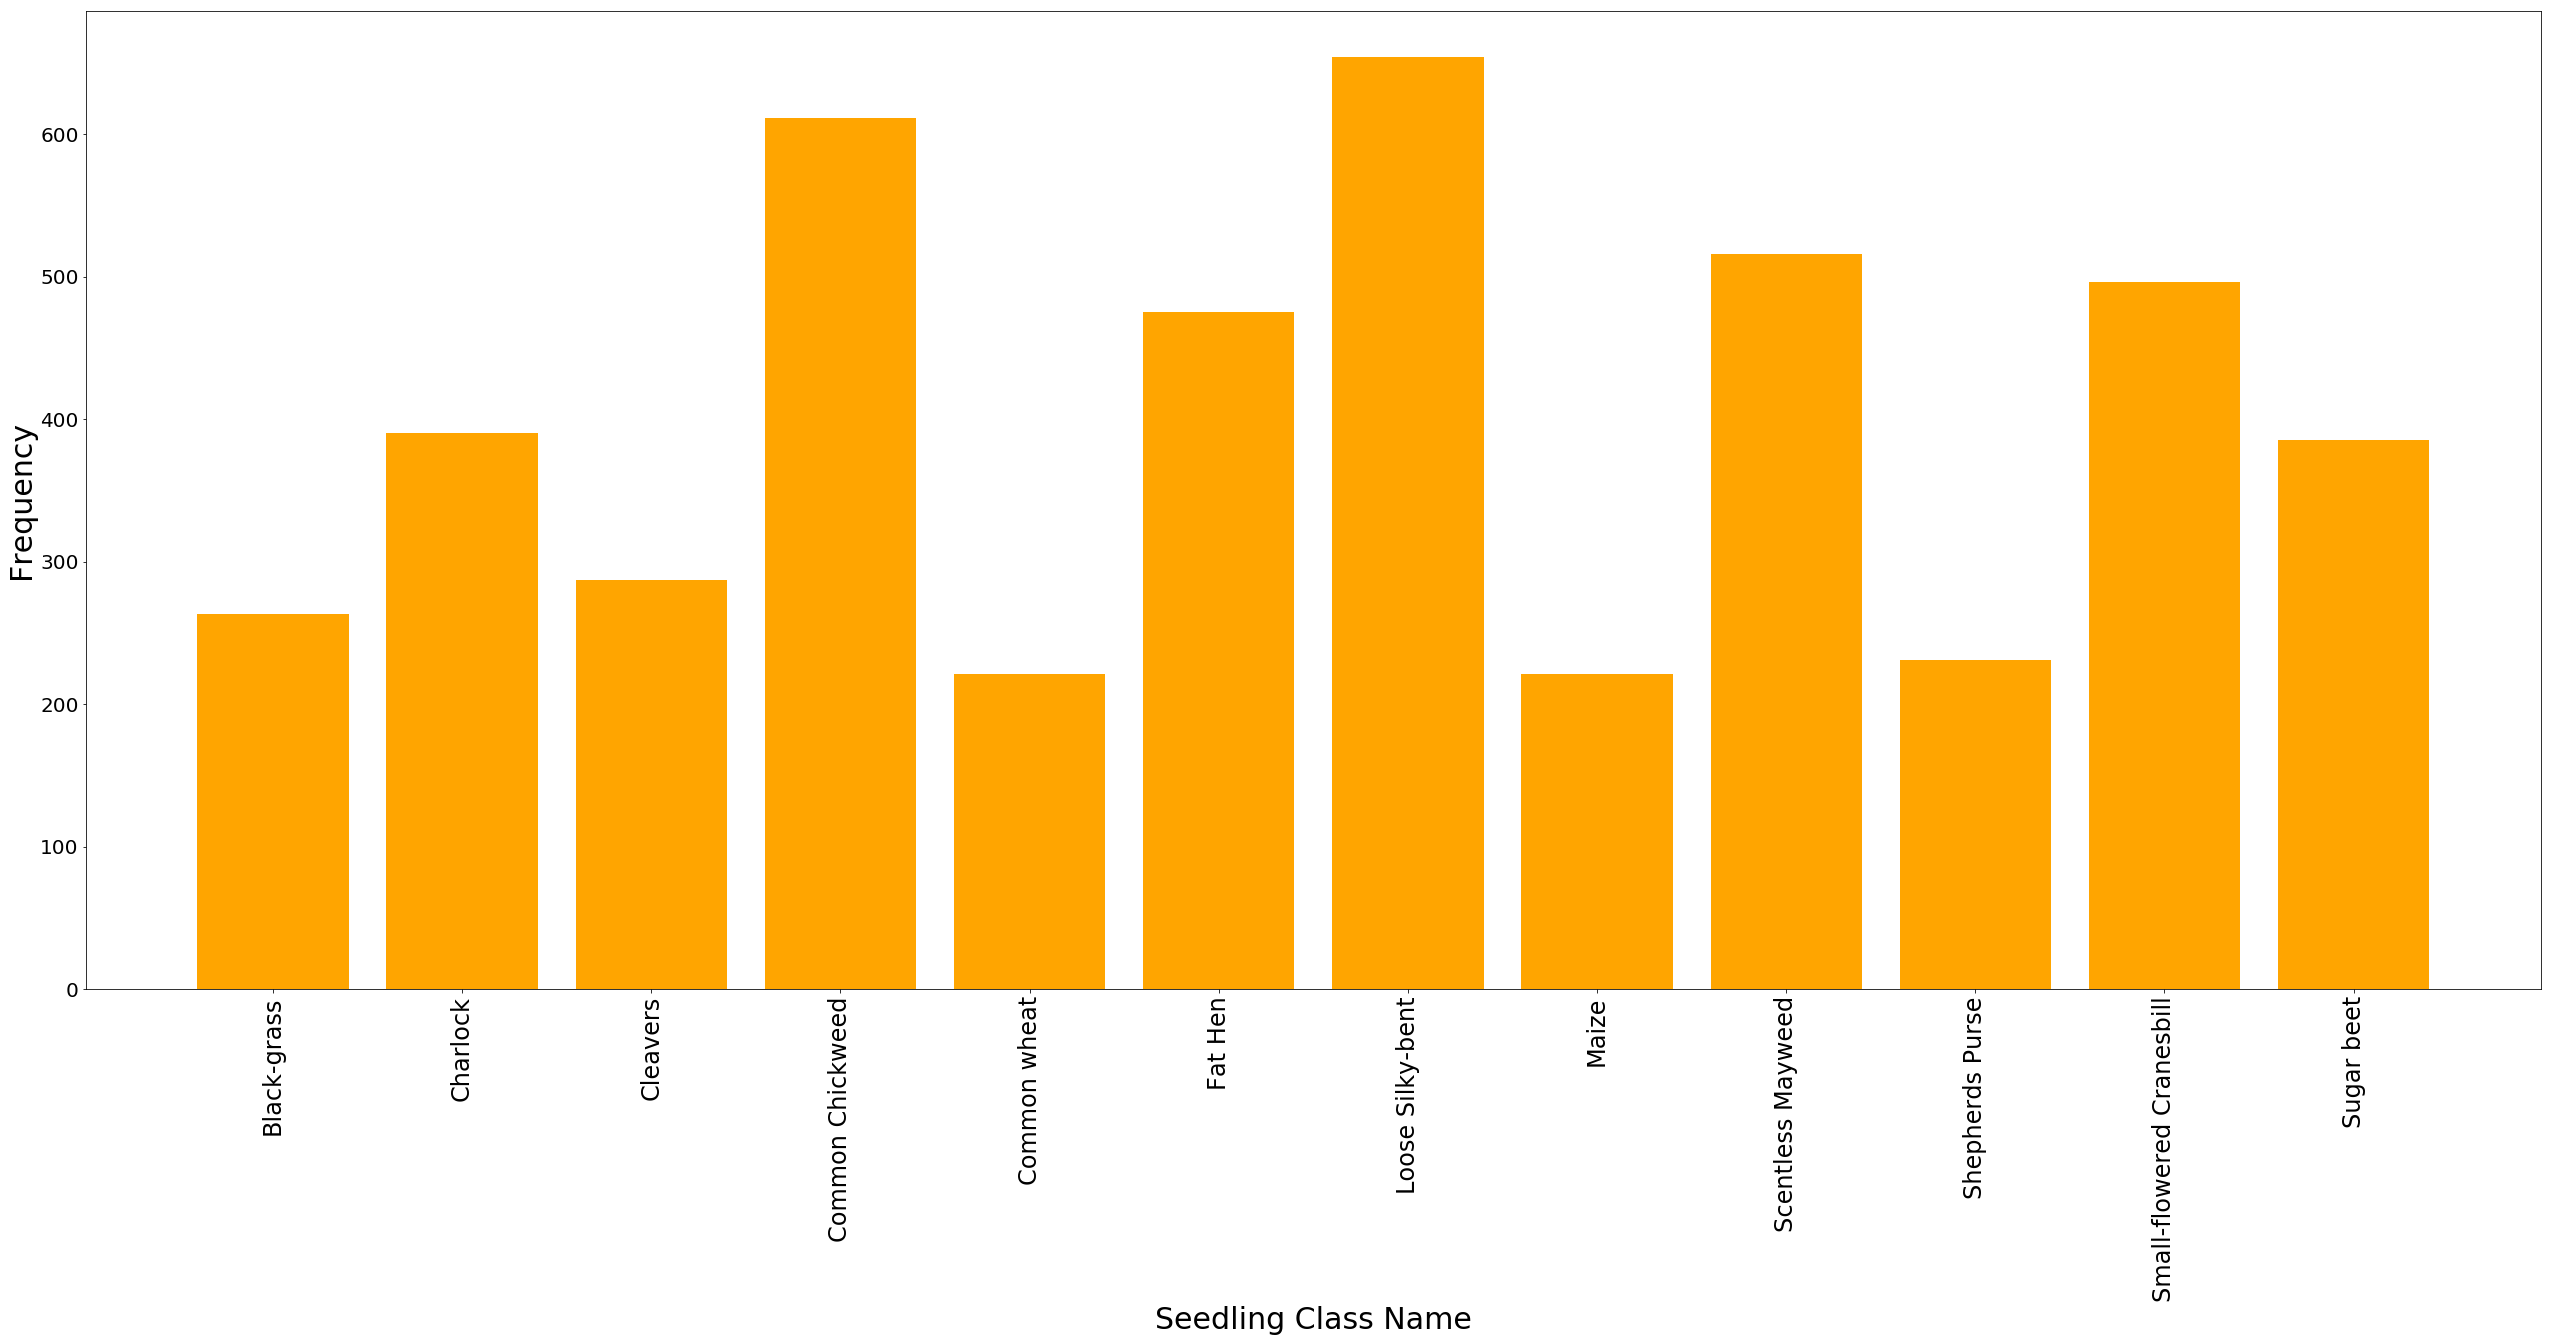

In [4]:
#Data Exploration
#Calculating the frequencies of various labels

dirs = os.listdir('../train');
label_freq = [];
sum = 0;

for name in dirs:
    path = '../train/' + name;
    sum += len(os.listdir(path))
    label_freq.append(len(os.listdir(path)));

print(sum)
#Visualization between Label and Frequency
plt.bar(dirs, label_freq, label='Seedling Class Frequencies', color='orange');
plt.xlabel('Seedling Class Name', fontsize=30);
plt.ylabel('Frequency', fontsize=30);
plt.rcParams['figure.figsize'] = (44,18);
plt.xticks(fontsize=24, rotation=90);
plt.yticks(fontsize=20);
plt.show();


In [5]:
#Venturing with Image Processing
#Channels in an image is basically the dimensions of color it has, eg. Usually images have 3 channels RGB.

test_img_dir = os.listdir('../train/Charlock');
test_img = cv2.imread('../train/Charlock/0a7e1ca41.png');
height, width, channels = test_img.shape;

resized_img = cv2.resize(test_img, (7,7));

print(resized_img.shape);
print(test_img.shape);
print(test_img.size);

(7, 7, 3)
(484, 484, 3)
702768


In [58]:
#Every Image now corresponds to 7 Matrices of size 7*3, 3 being channels RGB.
#Resizing each image to a scale of 7*7

path_to_images = '../train/*/*.png';
images = glob(path_to_images);
train_set = []
train_labels = []
num = len(images)

for i in images:
    train_set.append(cv2.resize(cv2.imread(i), (7,7)))
    train_labels.append(i.split('/train\\')[-1].split('\\')[-2])
    
train_set = np.asarray(train_set)
train_labels = pd.DataFrame(train_labels)
    

In [66]:
#Cleaning the image and Removing the background
#Let's keep it for later(if needed).

#Converting RGB Model to HSV Model 
#H: Hue, color.
#S: Saturation, amt to which respective color is mixed with white.
#V: Value, amt to which respective color is mixed with black.


Label Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
[ 0  0  0 ... 11 11 11]
(4750, 12)


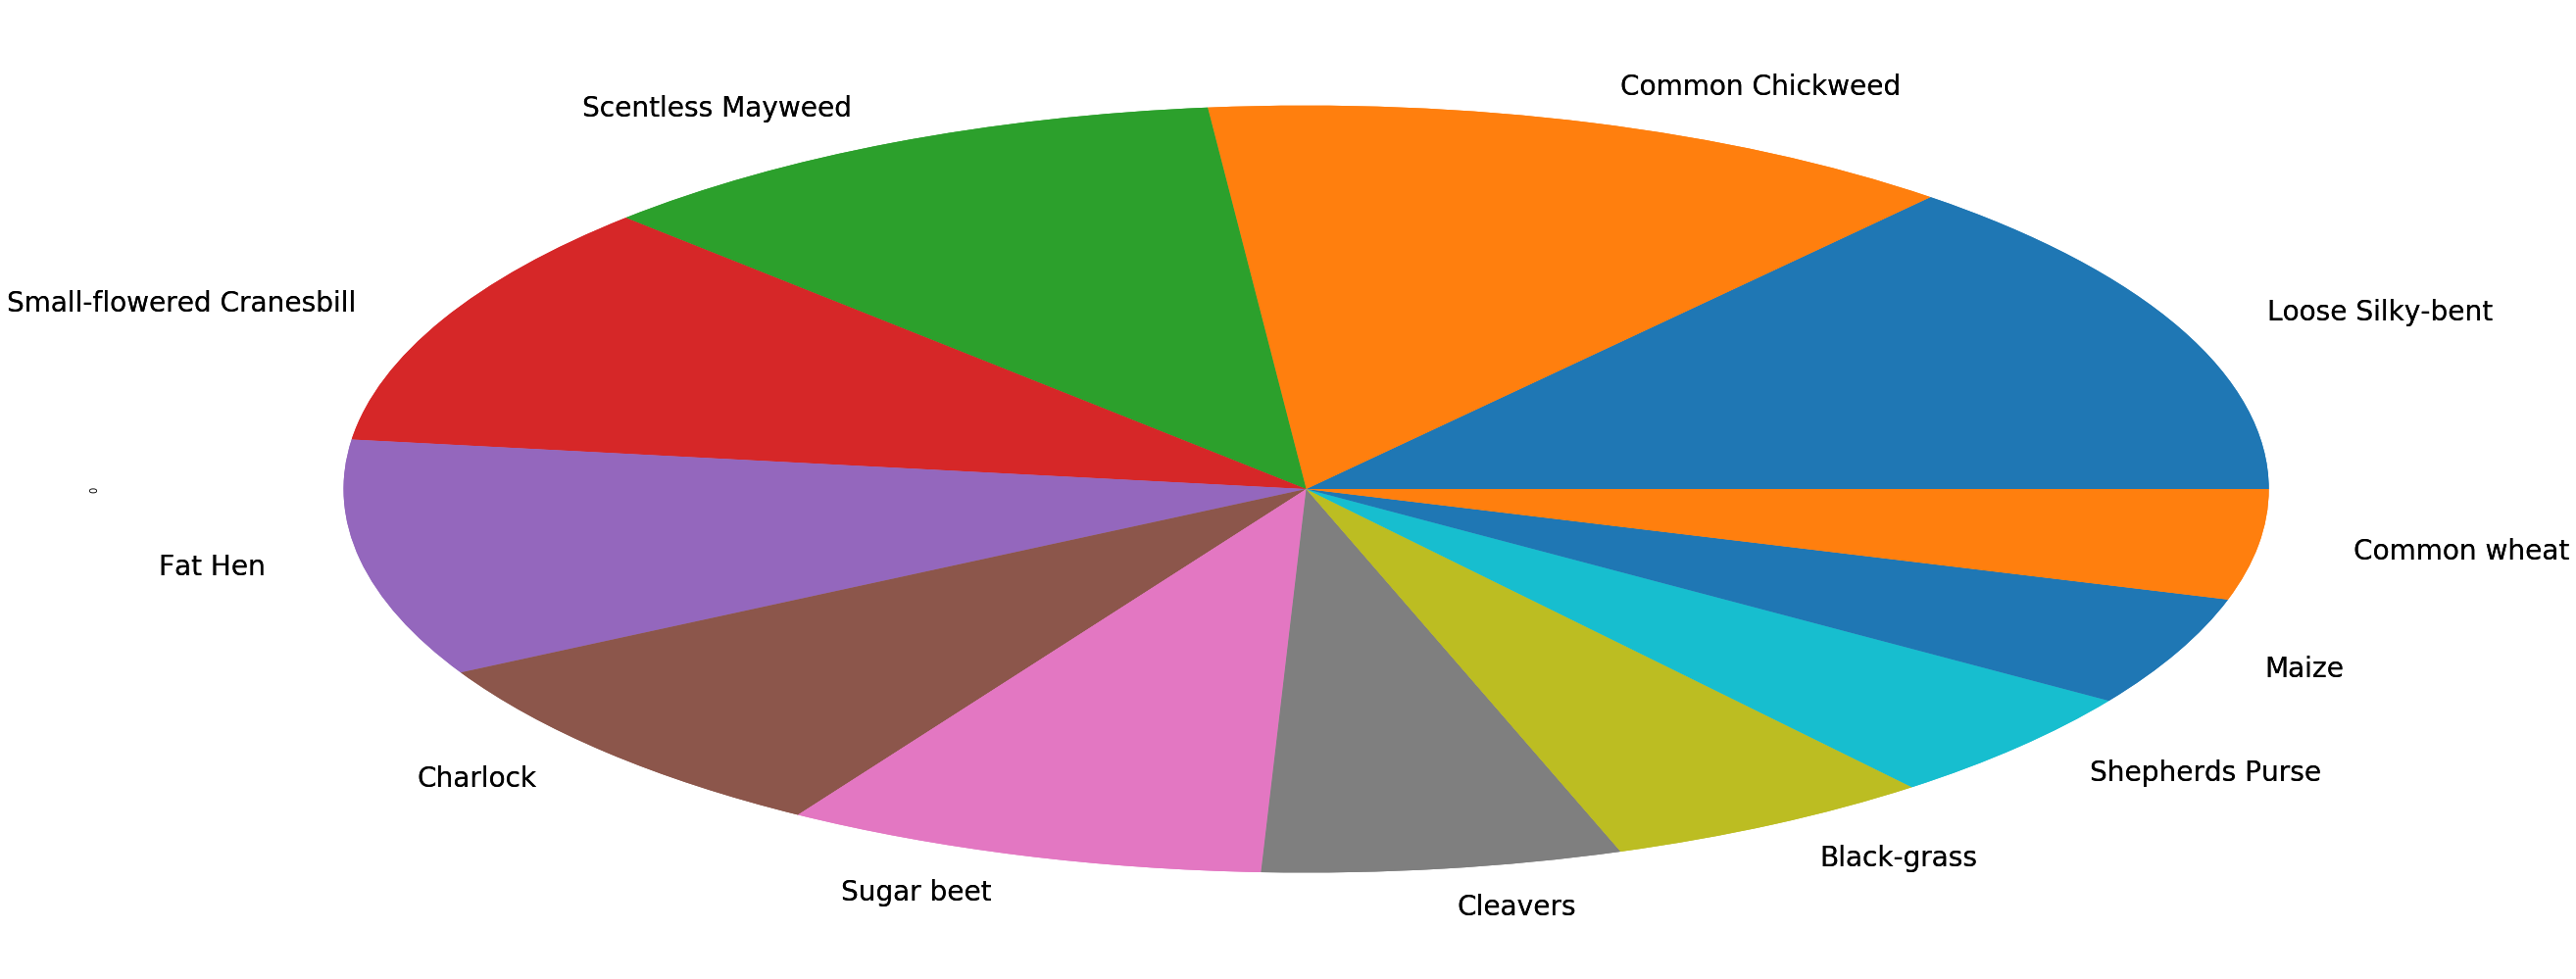

In [19]:
#Converting String classes into Numeric label arrays
#[0] is used to convert a column vector in a 1D Array
#np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

labels = preprocessing.LabelEncoder()
labels.fit(train_labels[0])
print('Label Classes: '+ str(labels.classes_))

encoded_labels = labels.transform(train_labels[0])
print(encoded_labels)

cat_labels = np_utils.to_#Visualizations using t-SNE
#t-Distributed Stochastic Neighboring Embeddings.
#Similar to PCA but much better, maintains small pairwise distances unlike PCA whose utility function is to maximize variance.
#It's basically a dimensionality reduction technique.

TSNE = TSNE(n_components=2).fit_transform(X)categorical(encoded_labels)
print(cat_labels.shape)

train_labels[0].value_counts().plot(kind='pie', fontsize='28')
plt.show()

In [67]:
#Visualizations using t-SNE
#t-Distributed Stochastic Neighboring Embeddings.
#Similar to PCA but much better, maintains small pairwise distances unlike PCA whose utility function is to maximize variance.
#It's basically a dimensionality reduction technique.

#Merging the entire 7*7*3 matrices into in 1D array with dimension 4750*147
tsne_data = train_set.reshape((train_set.shape[0], -1))
print(tsne_data.shape)
print(tsne_data[0])

tsne_digits = TSNE(random_state=1024).fit_transform(tsne_data)

#TSNE = TSNE(n_components=4).fit_transform(train_set)

(4750, 147)
[ 34  55  72  61  81  97  40  63  81  58  74  86  42  50  58  66  77  94
  45  52  72  45  64  76  51  58  73  33  41  65  52  64  79  25  41  72
  34  47  71  50  62  71  43  61  73  43  63  79  62  77  90  23  26  36
  46  66  82  63  76  85  25  28  39 132 143 144 111 124 126  64  87  88
  45  77  71 107 124 122 117 132 134 115 133 139  53  50  54  53  51  55
 166 157 153  54  53  54  58  52  61  56  52  52  76  74  76  52  52  52
  51  47  52 166 159 152  54  51  53  55  52  58  59  53  53  73  70  73
  54  51  56  56  52  55 166 158 152  53  49  48  57  53  58  52  49  50
  71  70  71]


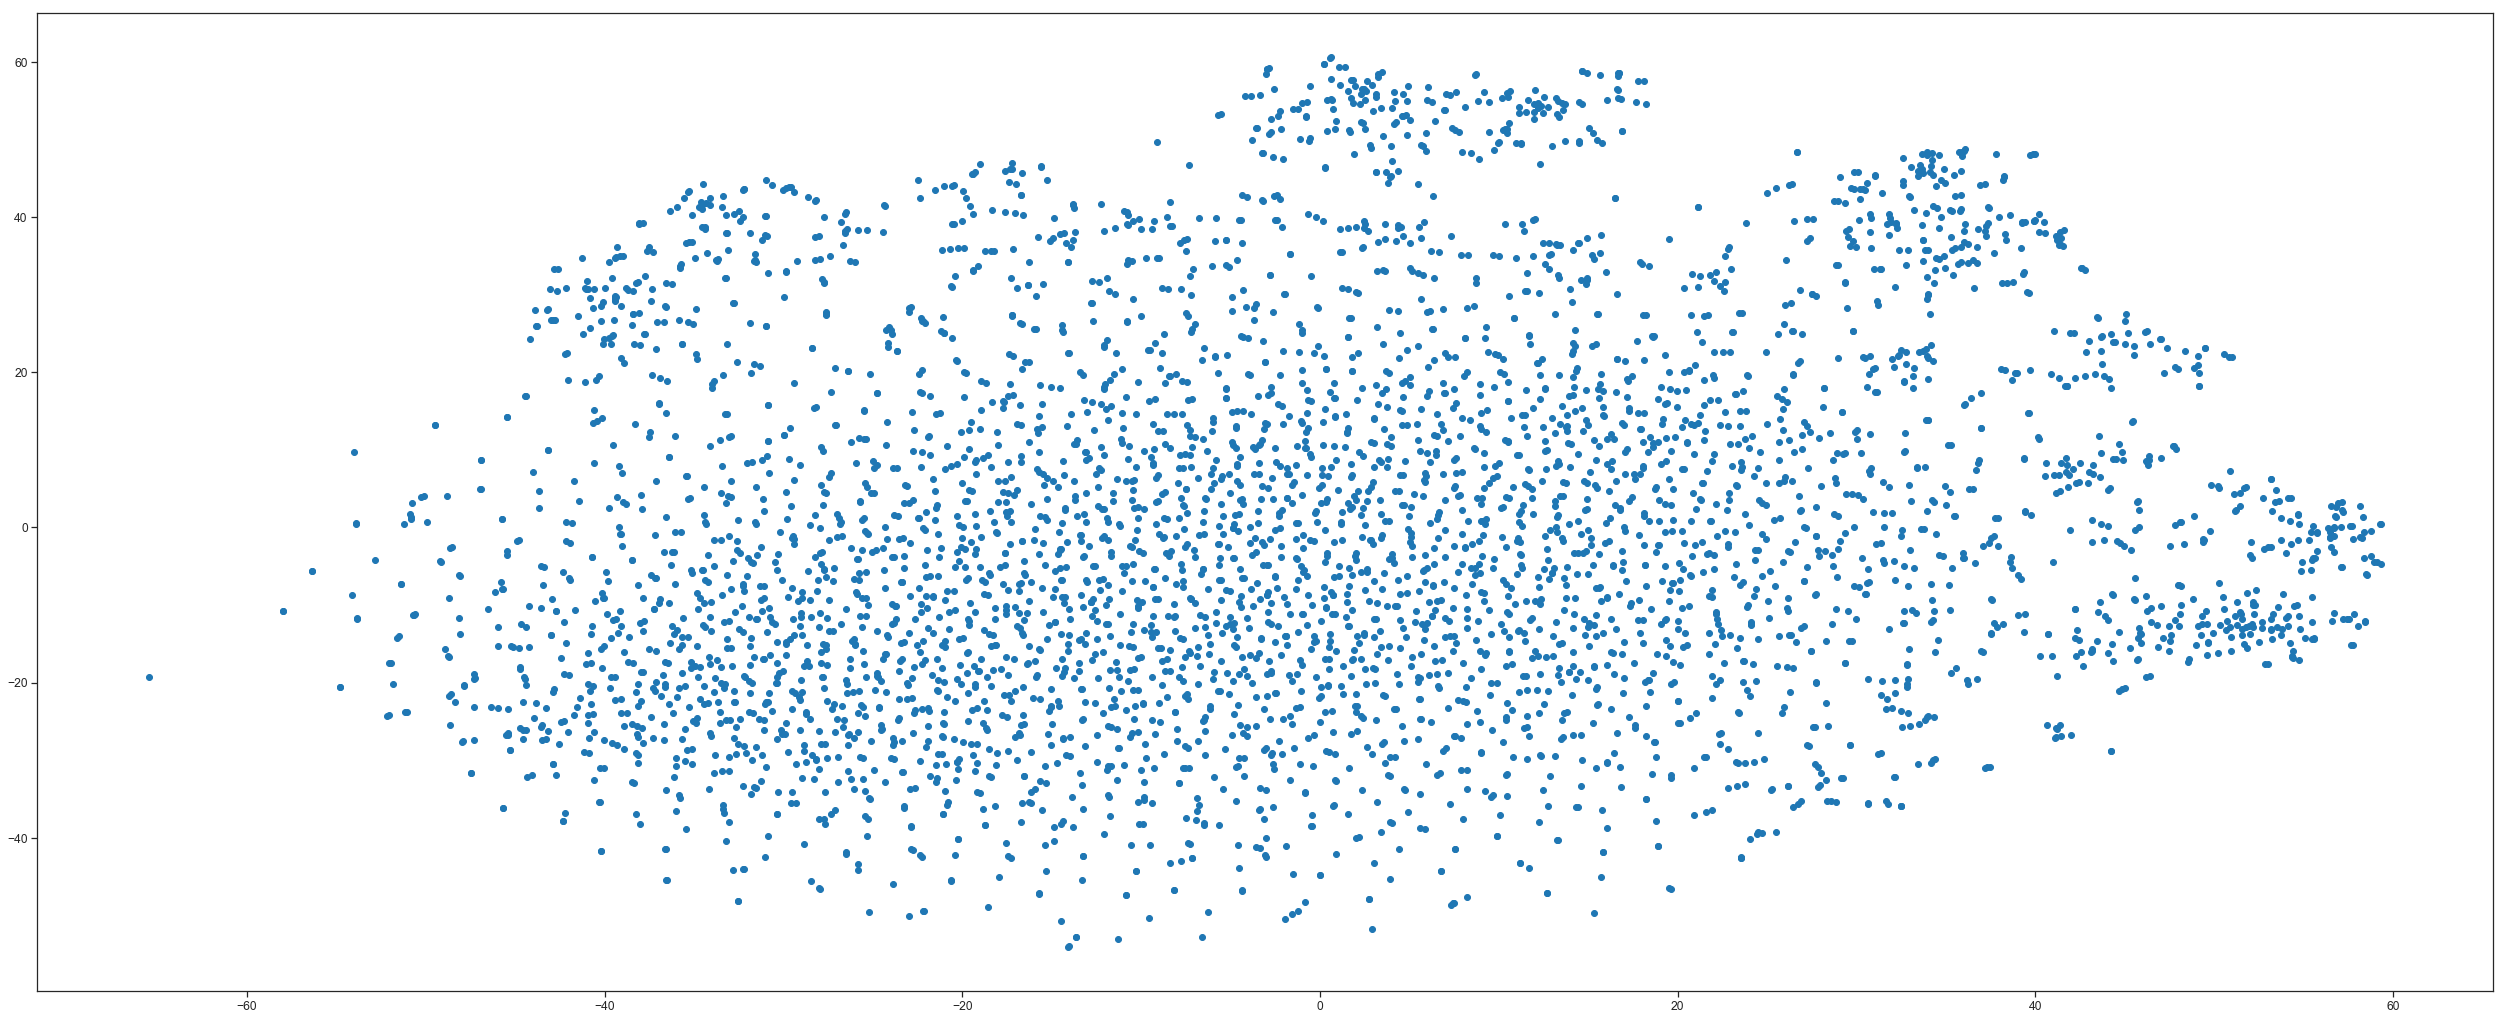

In [92]:
#Scatter PLot Implementation of t-SNE, need to change it seaborn.

sns.set_context('notebook', font_scale=1.1);
sns.set_style('ticks');

plt.scatter(tsne_digits[:, 0], tsne_digits[:, 1])
plt.rcParams.update({'font.size': 22})
plt.show()


#sns.lmplot(x='Dim1', y='Dim2', data=tsne_digits, fit_reg=False, legend=True, size=9, hue='Label')

In [28]:
#Splitting the entire dataset in Train and Test.

x_train, x_test, y_train, y_test = train_test_split(train_set, cat_labels, test_size=0.1, random_state=1024)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(4275, 7, 7, 3) (4275, 12) (475, 7, 7, 3) (475, 12)
